In [46]:
import pandas as pd
import numpy as np

df = pd.read_csv("system-overhead.csv")
df["duration"] = pd.to_timedelta(df["duration"])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   run       9 non-null      int64          
 1   duration  9 non-null      timedelta64[ns]
 2   scenario  9 non-null      object         
dtypes: int64(1), object(1), timedelta64[ns](1)
memory usage: 344.0+ bytes


,run,duration,scenario
0,0,0 days 00:00:47.233643996,opp_runall
1,1,0 days 00:00:47.566043849,opp_runall
2,2,0 days 00:00:45.990904016,opp_runall
3,0,0 days 00:00:57.377697478,opp_edge_run
4,1,0 days 00:00:56.945937519,opp_edge_run


opp_runall 46.930197 0.830256
opp_edge_run 57.089915 0.249226
opp_edge_run docker 189.47468 57.323762


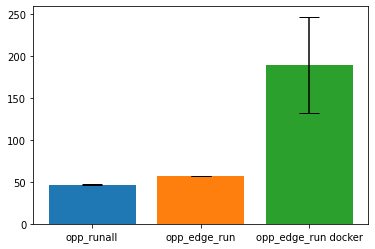

In [47]:
import matplotlib.pyplot as plt

scenarios = df["scenario"].unique()

for scenario in scenarios:
    durations = df.loc[df.scenario == scenario].duration
    mean = durations.mean()
    std = durations.std()
    
    print(scenario, mean.total_seconds(), std.total_seconds())
    plt.bar(scenario, mean.total_seconds(), yerr=std.total_seconds(), capsize=10)